# 02_Linear Regression

    ## 2.1 개념
    ## 2.2 키와 몸무게 데이터셋
    ## 2.3 선형회귀 주의사항

## 2.1 개념

* 회귀 분석은 양적 질문에 대한 답을 찾는데 도움이 됨  
* 회귀 분석은 **통계**에 뿌리를 두고 있음   
* 주어진 입력 값 X에 대한 출력 값 Y를 예측하기 위해 선형 관계를 사용  
** 이 선형 관계를 선형 회귀 또는 회귀 선이라고 함**  

수학적으로, 선형 회귀는 다음과 같이 표현됨  

$$y = b_0 + b_{1}x$$

여기서,  
$b_{0}$: y 절편  
$b_{1}$은 선의 기울기임  

위의 방정식은 직선이 표현되는 방식과 매우 유사하므로 선형 회귀라는 이름을 사용  

이제 알 수없는 데이터를 잘 예측할 수 있도록 입력에 맞는 행을 어떻게 결정할 수 있는가?  
그 전에 오류 측정이 필요함  
다양한 오류 조치가있을 수 있으며 가장 일반적으로 사용되는 것은 **최소제곱법**임  

**최소제곱법**을 정의하기 전에 먼저 **잔차**라는 용어를 이해해야합니다. 잔차는 단순히 Y값이 적합한 값에서 벗어난 것입니다. 
수학적으로 :  
$$residual_{i} = y_i - \hat{y}_{i}$$

여기서 $\hat{y}_{}$ 는 y의 회귀식의 값  

**최소제곱법**은 잔차의 제곱의 합이 최소일 때 데이터에 대한 모델의 최적 적합이 발생한다고 가정함  

수학적으로 표현하면:  

$$Sum \; of \; Squares \; of \; residual = SS(residual_{i}) = SSE_{i}$$  
$$\begin{split} 
SSE_{i} &= \sum^{n}_{i=1}{(y_{i} - \hat{y}_{i})^{2}} \\
&= \sum^{n}_{i=1}{( y_{i} - (b_{0} + b_{1}x_{i}) )^{2}}
\end{split}$$  

미적분을 사용하여 잔차에 대한 제곱합을 최소화하고 해당 계수를 찾음  

## 2.2 키와 몸무게 데이터셋

> 키와 몸무게와 데이터셋

In [1]:
height = c(69.1,56.4,65.3,62.8,63,57.3,59.8,62.5,62.5,59.0,51.3,64,56.4,66.5,72.2,65.0,67.0,57.6,66.6)
weight = c(113,84,99,103,102,83,85,113,84,99,51,90,77,112,150,128,133,85,112)

무게와 높이 사이에 어떤 관계가 있는지 보면  

In [2]:
cor(height,weight)

[1] 0.8848454

선형 회귀 분석에 적합하려면 먼저 데이터를 이해하고 두 변수 (체중과 신장) 사이에 상관 관계가 있는지 산점도로 확인하면  

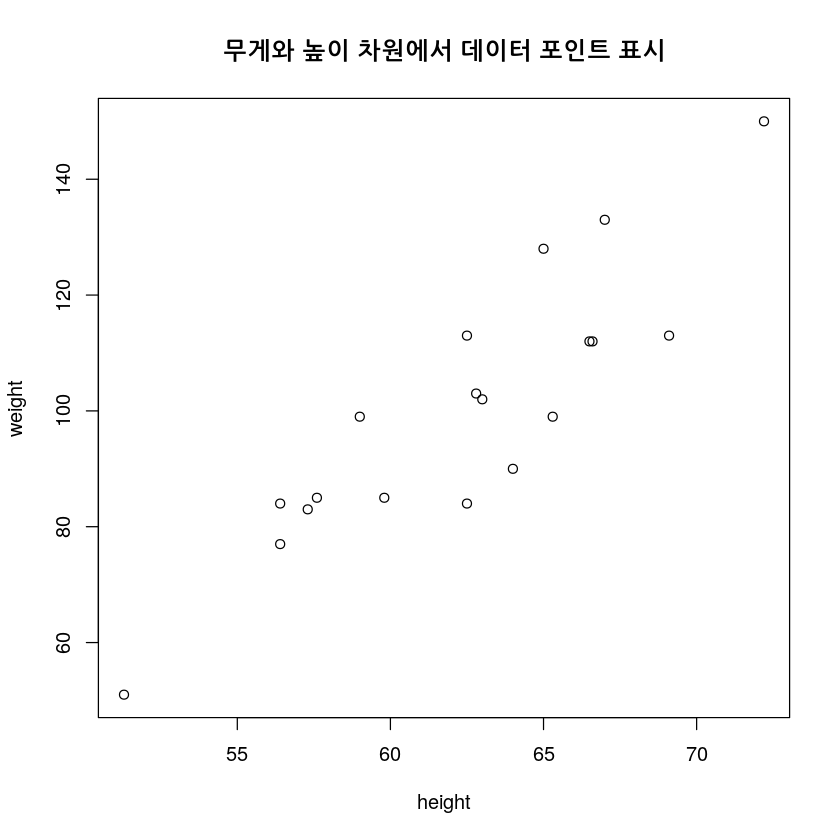

In [3]:
plot(height, weight, main="무게와 높이 차원에서 데이터 포인트 표시")

In [4]:
cor(height,weight)

[1] 0.8848454

inbuilt 유틸리티 나 선형 모델 유틸리티를 사용하여 계수 $b_0$와 $b_1$을 찾을 수 있음  

In [5]:
#Fitting the linear model
model <- lm(weight ~ height) # weight = slope*weight + intercept

In [6]:
#get the intercept(b0) and the slope(b1) values
model


Call:
lm(formula = weight ~ height)

Coefficients:
(Intercept)       height  
   -143.227        3.905  


다음 명령을 사용하여 lm 유틸리티가 계산 한 자세한 내용을 조금 더 알아볼 수 있음  

In [7]:
#check all attributes calculated by lm
attributes(model)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

In [8]:
#getting only the intercept
cat("model$coefficients[1]: ", model$coefficients[1], "\n")
cat("model$coefficients[2]: ", model$coefficients[2], "\n")
cat("residuals(model): ", residuals(model), "\n")

model$coefficients[1]:  -143.2266 
model$coefficients[2]:  3.904675 
residuals(model):  -13.58638 7.00299 -12.74861 1.013074 -0.7678614 2.488783 -5.272903 12.18448 -16.81552 11.85084 -6.083169 -16.67254 0.002990499 -4.434222 11.30913 17.42279 14.61344 3.317381 -4.82469 


In [9]:
#predicting the weight for a given height, say 60 inches
predictions = model$coefficients[[2]]*50 + model$coefficients[[1]]
cat("predict: ", predictions, "\n")

predict:  52.00709 


In [10]:
#detailed information about the model
summary(model)


Call:
lm(formula = weight ~ height)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.816  -5.678   0.003   9.156  17.423 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -143.2266    31.1802  -4.594 0.000259 ***
height         3.9047     0.4986   7.831 4.88e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.89 on 17 degrees of freedom
Multiple R-squared:  0.783,	Adjusted R-squared:  0.7702 
F-statistic: 61.32 on 1 and 17 DF,  p-value: 4.876e-07


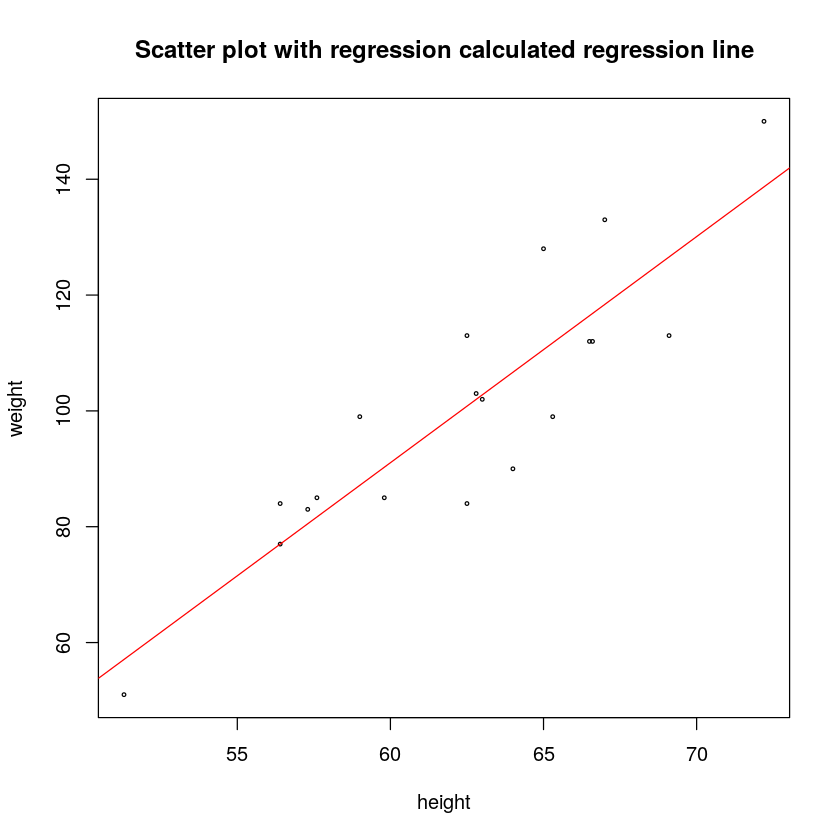

In [11]:
#plot data points
plot(height,weight, 
     main="Scatter plot with regression calculated regression line", 
     cex=0.4)

#draw the regression line
abline(model, col="red")

* 두 변수 사이의 관계를 식별 할 수있는 방법과 몇 줄의 코드를 사용하여 예측을 수행 할 수 있음  
* 선형 회귀를 사용할지 여부를 결정하기 전에 이해해야하는 몇 가지주의 사항이 있음  

## 2.3 선형회귀 주의사항

• 산점도는 선형 패턴을 형성  
• 그들 사이의 상관 관계는 중등도에서 강세 (0.5 또는 -0.5 이상)  

이전 두 조건 중 하나만 충족되는 경우 예측이 잘못되거나 모두 잘못된 모델로 이어질 수 있음  

* 예를 들어 상관 관계 만 확인하고 강점을 찾아 분산 형 플롯을 보는 단계를 건너 뛰면 데이터 자체가 다음과 같을 때 직선을 맞추려고했을 때 잘못된 예측이 발생할 수 있습니다 곡선 형 (곡선 형 데이터 세트는 또한 높은 상관 값을 가질 수 있음)  

* 상관 관계가 인과관계를 나타내지 않음 
* **cofounding 변수**라고하는 세 번째 변수로 인해 원인과 결과가 간접적으로 관련되는 경우가 있을 수 있음  
* 이를 설명 하는 예는  
    * 날씨가 더우면 아이스크림을 많이 먹음(상관관계 높음), 날씨가 더우면 벌레에 많이 물림(상관관계 높음) 
    * 그러나 아이스크림을 많이 먹는다고 벌레에 많이 물리는 것은 아님  

* 선형 회귀 분석은 금융 분야에서 응용 분야를 찾아 투자에 대한 위험을 정량화하는 데 사용  
* 또한 추세선 분석 등을 위해 경제 분야에서 널리 사용됨  

**선형 회귀** 이외에 **로지스틱 회귀**, **단계별 회귀**, **다 변수 적응 회귀 스플라인(MARS)** 및 기타 여러 회귀 회귀 학습 알고리즘이 있음  